<div style='display:flex;flex-direction:row;justify-content:space-between;'>
    <span>Flörian Döring, Lukas Wrana &nbsp;</span>
    <span style='color:lightgrey;'>Computer assisted mathematics, 2024 <b>[Seminar]</b></span>
</div>

# **Cramer's Rule**

---

## **Outline**

1. Introduction
2. Geometric Interpretation
3. Simple proof
4. Sage Implementation
5. Examples

---

## **1. Introduction**

**Cramer's Rule** provides an explicit formula for the solution of a system of linear equations with as many equations as unknowns, valid whenever the system has a unique solution.

&nbsp;

<div style="background-color: rgb(240, 240, 240); padding: 1rem 3rem; margin: 0 3rem; border-radius: .1rem;">
    
### **Definiton**

Suppose a system of linear quations 

$$A\mathbf x = \mathbf b$$ 

where $A\in\mathbb K^{n\times n}$ and $\mathbf b\in\mathbb K^n$ for $n\in \mathbb N$.

If $\det(A)\neq 0$, the individiual values of the solution $\mathbf x = (x_1,...,x_n)^{\text T}$ are given by:

$$x_i=\frac {\det(A_i)} {\det(A)}\qquad i=1,...,n $$

where $A_i$ is the matrix formed by replacing the $i$\-th column of $A$ with $\mathbf b$.
</div>

&nbsp;

### **History**

The rule was named after _Gabriel Cramer_ \(1704\-1752\) for an arbitrary number of unknowns in 1750. However _Gottfried Wilhelm Leibniz_ wrote down Cramer's rule in a manuscript as early as 1678. The proof of Cramer's rule was first provided by _Augustin Louis Cauchy_ in 1815, when he also introduced the notation of Cramer's rule used today.

---

## **2. Geometric interpretation**

Calculating solutions with Cramer's Rule is very inefficient compared to other methods, like Gaussian-Elimination. However, Cramer's Rule gives valuable inside in the nature of systems of linear equations.

&nbsp;

<div style="background-color: rgb(240, 240, 240); padding: 1rem 3rem; margin: 0 3rem; border-radius: .1rem;">

### **Determinants**
Geometrically, the Determinant is given by the signed $n$-dimensional volume of a $n$-dimensional parallelepiped, created by the column vectors of a $n\times n$-matrix.

</div>

&nbsp;

This might sound complicated at first, but let's look at this in $2$ dimensions. Let

$$A\mathbf x=\mathbf b$$

where $A\in\mathbb K^{2\times 2}$ and $\mathbf b\in\mathbb K^n$. In our $2$-dimensional example, the $2$-dimensional volume of the $2$-dimensional parallelepiped is the signed Area of the parallelogram, formed by the two column vectros of $A$.

In [1]:
@interact
def _(A=input_box('[[1, 1],[-1, 3]]', 'A', str), b=input_box('[2, 1]', 'b', str)):
    try:
        A = matrix(ZZ, eval(A))
        b = vector(eval(b))
    except:
        print('Invalid input.')
        return
    
    if not (A.nrows() == A.ncols() == len(b)):
        print('Invalid dimensions.')
        return
    
    a1 = A.column(0)
    a2 = A.column(1)
    
    arr1 = arrow2d([0, 0], b)
    arr2 = arrow2d([0, 0], a1, color='red')
    arr3 = arrow2d([0, 0], a2, color='red')
    poly1 = polygon([[0, 0], a1, a1 + a2, a2], color='#fabab9')
    
    x = A.solve_right(b)
    
    if x != None:
        xa1 = x[0] * a1
        xa2 = x[1] * a2
        
        arr4 = arrow2d([0, 0], xa1, color='purple')
        arr5 = arrow2d([0, 0], xa2, color='purple')
        poly2 = polygon([[0, 0], xa1, xa1 + xa2, xa2], fill=False, linestyle='dashed', color='purple')
        
        p = poly1 + poly2 + arr1 + arr2 + arr3 + arr4 + arr5
    else:
        p = poly1 + arr1 + arr2 + arr3
    
    show(plot(p))
    

Interactive function <function _ at 0x11f9a3100> with 2 widgets
  A: TransformText(value='[[1, 1],[-1, 3]]', description='A', layout=Layout(max_width='81em'))
  b: TransformText(value='[2, 1]', description='b', layout=Layout(max_width='81em'))

...


---

## **3. Proof**

Let $\mathbf X_i\in\mathbb K^{n\times n}$ be the matrix formed by replacing the $i$-th column of the Identity Matrix, with $\mathbf x=(x_1,…,x_n)^{\text T}\in\mathbb K^n$.

$$\mathbf X_i=\begin{bmatrix}
1&&x_1\\
&\ddots&\vdots\\
&&x_i\\
&&\vdots&\ddots\\
&&x_n&&1
\end{bmatrix}$$

By using Laplace expansion on the the $i$-th column, we get:

$$\begin{align}
\det(\mathbf X_i) &= \sum_{j=1}^n (-1)^{i+j} x_j \det(\mathbf S_{j,i})\\
&= (-1)^{2i}x_i \det\begin{bmatrix}1\\&\ddots\\&&1\end{bmatrix} + \sum_{j=1, j≠i}^n (-1)^{i+j} x_j \det(\mathbf S_{j,i})\\
&= x_i\qquad\forall i=1,…,n
\end{align}$$

where $\mathbf S_{j,i}$ is the submatrix obtained by removing the $j$-th row and the $i$-th column of $X_i$. All $S_{j,i}$ are triangular matrices. For those with $i≠j$, we can also observe that they contain a row where all values are 0. Since the determinant of any triangular matrix can be given by the product of the diagonal entries, $\det(\mathbf S_{j,i}) = 0$ for $j≠i$.

Let $A\in\mathbb K^{n\times n}$, then: 

$$\begin{align}
A\mathbf X_i&=
\begin{bmatrix}
a_{11}&a_{12}&\dots&a_{1n-1}&a_{1n}\\
a_{21}&a_{22}&\dots&a_{2n-1}&a_{2n}\\
\vdots&\vdots&\ddots&\vdots&\vdots\\
a_{n-11}&a_{n-12}&\dots&a_{n-1n-1}&a_{n-1n}\\
a_{n1}&a_{n2}&\dots&a_{nn-1}&a_{nn}\\
\end{bmatrix}
\begin{bmatrix}1&&x_1\\&\ddots&\vdots\\&&x_i\\&&\vdots&\ddots\\&&x_n&&1\end{bmatrix}\\
&=\begin{bmatrix}
a_{11}&\dots&a_{1i-1}&a_{11}x_1+…+a_{1n}x_n&a_{1i+1}&\dots&a_{1n}\\
a_{21}&\dots&a_{2i-1}&a_{21}x_1+…+a_{2n}x_n&a_{2i+1}&\dots&a_{2n}\\
\vdots&\ddots&\vdots&\vdots&\vdots&\ddots&\vdots\\
a_{n-11}&\dots&a_{n-1i-1}&a_{n-11}x_1+…+a_{n-1n}x_n&a_{n-1i+1}&\dots&a_{n-1n}\\
a_{n1}&\dots&a_{ni-1}&a_{n1}x_1+…+a_{nn}x_n&a_{ni+1}&\dots&a_{nn}\\
\end{bmatrix}\\
&=\begin{bmatrix}
a_{11}&\dots&a_{1i-1}&b_1&a_{1i+1}&\dots&a_{1n}\\
a_{21}&\dots&a_{2i-1}&b_2&a_{2i+1}&\dots&a_{2n}\\
\vdots&\ddots&\vdots&\vdots&\vdots&\ddots&\vdots\\
a_{n-11}&\dots&a_{n-1i-1}&b_{n-1}&a_{n-1i+1}&\dots&a_{n-1n}\\
a_{n1}&\dots&a_{ni-1}&b_n&a_{ni+1}&\dots&a_{nn}\\
\end{bmatrix}=A_i
\end{align}$$

By the product rule for determinants follows:

$$\begin{alignat}{4}
&& \det(A) &\,\cdot&\, \det(\mathbf X_i) &= \det(A_i) \\
\Leftrightarrow \qquad&& \det(A) &\,\cdot & x_i &= \det(A_i) \\
\Leftrightarrow \qquad&& &&x_i&=\dfrac{\det(A_i)}{\det(A)}\qquad i=1,…,n
\end{alignat}$$

$\square$

---

## **4. Sage Implementation**

### **4.1 Code**

In [2]:
def cramer(A, b):
    # A: n x n - Matrix
    # b: Vector of length n
    if not (A.nrows() == A.ncols() == len(b)):
        return
    
    n = A.nrows()
    x = zero_vector(SR, n)
    detA = A.det()
    
    # if det(A) = 0, the system of linear equations doesn't
    # have a explicit solution.
    if detA == 0:
        return
    
    for i in range(n):
        Ai = copy(A)  # a copy of A
        Ai[:,i] = b   # replace the i'th column with b
        x[i] = Ai.det() / detA
    return x

&nbsp;

### **4.2 Testing**

To show that this function does indeed deliver the correct result, we conducted some testing. For a given $n\in\mathbb N$ we compare the result of our cramer implementation to the result of sages built in algorithm (with tolerance), over multiple iterations of random generated systems of linear equations.

In [27]:
def random_vector(size):
    return vector([random() for t in range(size)])

# we have to compare the vectors with a given tolerance to
# account for small numeric deviations
def equal(u, v, tol = 1e-8):
    return all(abs(a - b) < tol for a, b in zip(u, v))

def validation(iterations, n):
    for i in range(iterations):
        M = random_matrix(RR, n, n)
        v = random_vector(n)

        # if det(A) = 0, the result of our function cannot be compared
        if not equal(cramer(M, v), M.solve_right(v)) and M.det() != 0:
            print('Test failed.')
            return

    print('Test successfull.')

validation(100, 2)
validation(100, 4)
validation(100, 8)
validation(100, 16)

Test successfull.
Test successfull.
Test successfull.
Test successfull.


&nbsp;

### **4.3 Perfomance**

We've noted before that in general, Cramer's rule isn't used for calculating solutions due to it's (bad) runtime complexity. To visualize this, we can plot the execution time of both algorithms used above side by side for $n=1,...,12$.


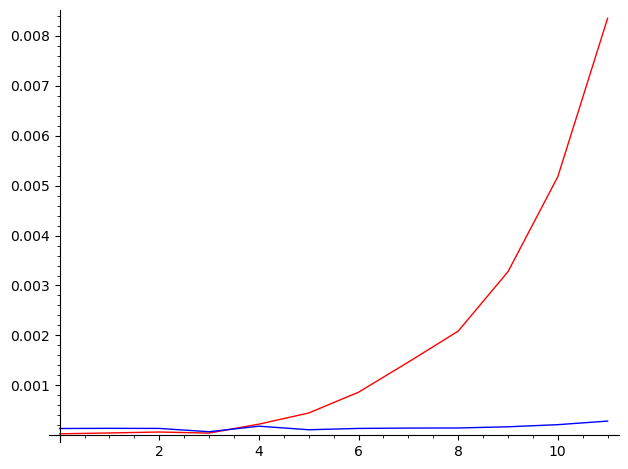

In [30]:
import time

t_cramer = []
t_standart = []

avg = 16

for i in range(12):
    M = random_matrix(RR, i, i)
    b = random_vector(i)

    t = 0

    for j in range(avg):
        start = time.time()
        cramer(M, b)
        end = time.time()
        t += end - start

    t_cramer.append(t / avg)
    t = 0

    for j in range(avg):
        start = time.time()
        M.solve_right(b)
        end = time.time()
        t += end - start

    t_standart.append(t / avg)

show(list_plot(t_cramer, plotjoined=True, color="red") + list_plot(t_standart, plotjoined=True))


---

## **5. Examples**

### **5.1  1 – Dimension**

Let's start with a trivial example. We want to find $\mathbf x\in\mathbb K$ with

$$a\mathbf x = b$$

for $a, b\in\mathbb K$. Cramer's rule implies the same operation we'd do to solve for $\mathbf x$:

$$\Rightarrow \mathbf x = \dfrac b a$$

### **5.2  2 – Dimensions**

Let $A\mathbf x=b$ with

$$
A := \begin{bmatrix}1&2\\3&4\end{bmatrix}\in\mathbb Q^{2\times 2},\qquad \mathbf x:=\begin{bmatrix}x_1\\x_2\end{bmatrix},\qquad b:=\begin{bmatrix}1\\2\end{bmatrix}\in\mathbb Q^2
$$

The determinant of a $2\times 2$-matrix is given by:

$$\begin{align}
\det\begin{bmatrix}a&c\\b&d\end{bmatrix}&=ad - bc\\
\Rightarrow\det(A)&= 1\cdot 4 - 2\cdot 3 =-2
\end{align}$$

We can use this to calculate $\mathbf x$:

$$\begin{align}
x_1 &= \dfrac {\det\begin{bmatrix}\mathbf 1&2\\\mathbf 2&4\end{bmatrix}} {\det(A)} = \dfrac 0 {-2}=0\\
x_2 &= \dfrac {\det\begin{bmatrix}1&\mathbf 1\\3&\mathbf 2\end{bmatrix}} {\det(A)} = \dfrac {-1}{-2}= \dfrac 1 2
\end{align}$$

As a result $\mathbf x=\begin{pmatrix}0,&\dfrac 1 2\end{pmatrix}$.

In [34]:
A = matrix(QQ, [[1, 2],[3, 4]])
b = vector([1, 2])

show(cramer(A, b))

(0, 1/2)

### **5.3  3 – Dimensions**

Let $A\mathbf x=b$ with

$$
A := \begin{bmatrix}9&8&7\\6&0&4\\3&2&1\end{bmatrix}\in\mathbb Q^{3\times 3},\qquad \mathbf x:=\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix},\qquad b:=\begin{bmatrix}1\\2\\3\end{bmatrix}\in\mathbb Q^3
$$

The determinant of a $3\times 3$-matrix is given by the rule of Sarrus:

$$\begin{align}
\det\begin{bmatrix}a&b&c\\d&e&f\\g&h&i\end{bmatrix}&=aei+bfg+cdh-ceg-bdi-afh\\
\Rightarrow\det(A)&= 9\cdot 0\cdot 1 + 8\cdot 4\cdot 3+7\cdot 6\cdot 2 -7\cdot 0\cdot 3 -8\cdot6\cdot 1-9\cdot 4\cdot 2 = 60
\end{align}$$

We can use this to calculate $\mathbf x$:

$$\begin{align}
x_1 &= \dfrac {\det\begin{bmatrix}\mathbf 1&8&7\\\mathbf 2&0&4\\\mathbf 3&2&1\end{bmatrix}} {\det(A)} = \dfrac {100} {60}=\dfrac 5 3\\
x_2 &= \dfrac {\det\begin{bmatrix}9&\mathbf 1&7\\6&\mathbf 2&4\\3&\mathbf 3&1\end{bmatrix}} {\det(A)} = \dfrac 0 {60}= 0\\
x_3 &= \dfrac {\det\begin{bmatrix}9&8&\mathbf 1\\6&0&\mathbf 2\\3&2&\mathbf 3\end{bmatrix}} {\det(A)} = \dfrac {-120} {60}=-2
\end{align}$$

As a result $\mathbf x=\begin{pmatrix}\dfrac 5 3,&0,&-2\end{pmatrix}$.

In [40]:
A = matrix(QQ, [[9, 8, 7],[6, 0, 4],[3, 2, 1]])
b = vector([1, 2, 3])

show(cramer(A, b))

(5/3, 0, -2)